In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import statsmodels
import scipy.stats as stats
import statsmodels.stats.proportion as smpt
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix,accuracy_score, classification_report,f1_score,cohen_kappa_score

In [2]:
d1=pd.read_csv('Bank Marketing Data Set.csv')
d1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campain,pdays,previous,poutcome,class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,2
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,2
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,2
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,1


In [3]:
d1.rename(columns={'class':'deposit','campain':'campaign'},inplace=True)

In [4]:
d1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,2
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,2
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,2
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,1


In [5]:
d1.shape

(45211, 17)

In [6]:
d1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
d1['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [8]:
num_col = ['int16','int32','int64','float16','float32','float64']

#Filter out variables with numeric datatypes
df_numcols_only= d1.select_dtypes(include= num_col)

In [9]:
cat_col=['object']
df_catcols_only=d1.select_dtypes(include=cat_col)

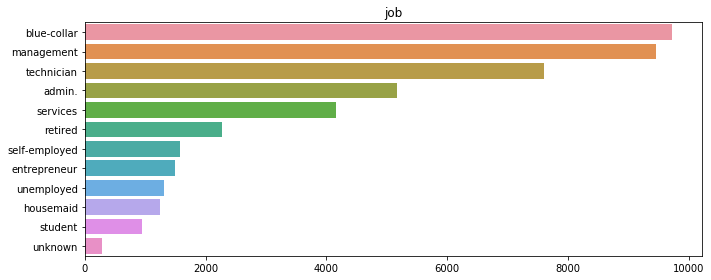

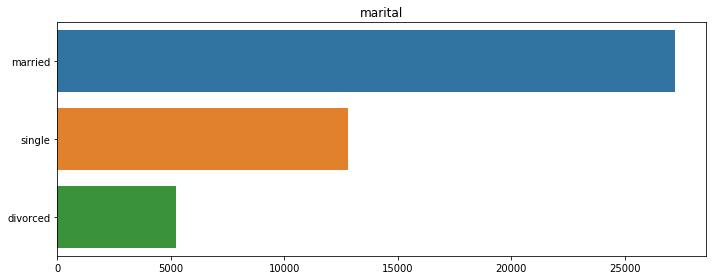

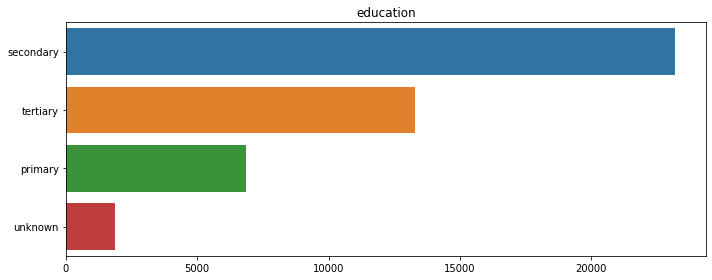

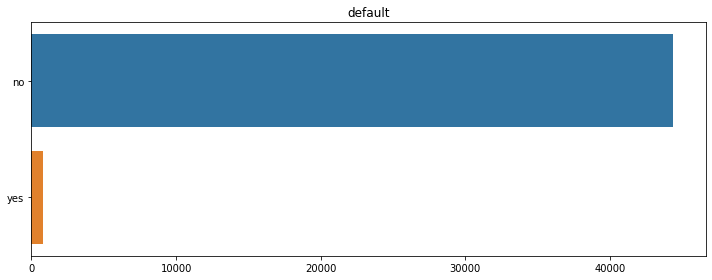

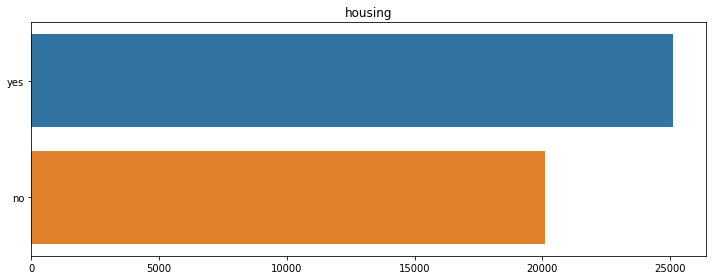

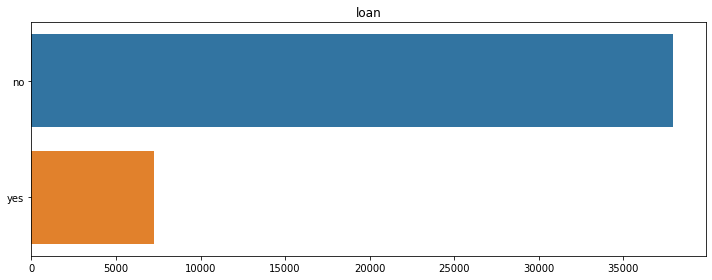

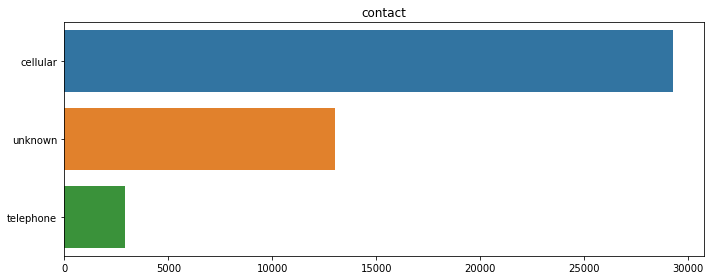

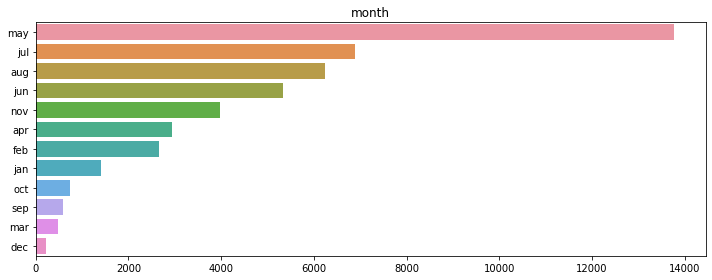

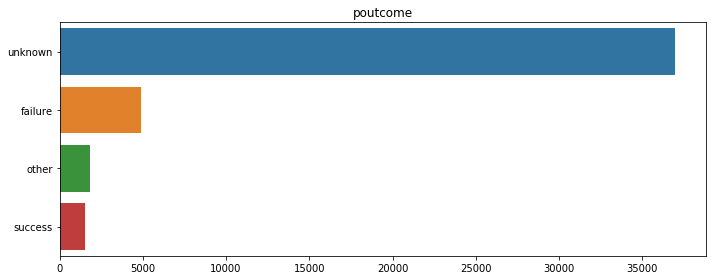

In [10]:
for col in df_catcols_only:
    plt.figure(figsize=(10,4))
    sns.barplot(d1[col].value_counts().values, d1[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

Inference/Result: There are unknown values for many variables in the Data set. There are many ways to handle missing data. One of the ways is to discard the row but that would lead to reduction of data set and hence would not serve our purpose of building an accurate and realistic prediction model.

Other method is to smartly infer the value of the unknown variable from the other variables. This a way of doing an imputation where we use other independent variables to infer the value of the missing variable. This doesn't gurantee that all missing values will be addressed but majority of them will have a reasonable which can be useful in the prediction.

Variables with unknown/missing values are : 'education', 'job', 'poutcome', 'contact'. Therefore, we start with creating new variables for the unknown values in 'education', 'job'. We do this to see if the values are missing at random or is there a pattern in the missing values.

In [11]:
d1['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [12]:
d1['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [13]:
d1['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [14]:
d1[(d1['contact']=='cellular') & (d1['deposit']==0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [15]:
d1[d1['deposit']==2]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,2
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,2
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,2
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,2
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,2
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,2
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,2
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,2


In [16]:
d1['deposit'].value_counts()

1    39922
2     5289
Name: deposit, dtype: int64

In [17]:
d1['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [18]:
d1['deposit'].value_counts()

1    39922
2     5289
Name: deposit, dtype: int64

In [19]:

## Creating new variables (variable name + '_un') to capture the information if the missing values are at random or is there
## a pattern in the missing values.
significant_cat_variables = ['education','job']
for var in significant_cat_variables:
    #df[var + '_un'] = 0
    #df[var + '_un'][df[var]=='unknown'] = 1
    #FIXME one-line coding
    d1[var + '_un'] = (d1[var] == 'unknown').astype(int)

In [20]:
d1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,education_un,job_un
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,2,0,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,2,0,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,2,0,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,1,0,0


In [21]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [22]:
cross_tab(d1,'job','education')

,tertiary,secondary,unknown,primary
job,,,,
admin.,572,4219,171,209
blue-collar,149,5371,454,3758
entrepreneur,686,542,76,183
housemaid,173,395,45,627
management,7801,1121,242,294
retired,366,984,119,795
self-employed,833,577,39,130
services,202,3457,150,345
student,223,508,163,44


In [23]:
d1.loc[(d1['age']>60) & (d1['job']=='unknown'),'job']='retired'
d1.loc[(d1['education']=='unknown') & (d1['job']=='admin.'), 'education'] = 'secondary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='blue-collar'), 'education'] = 'secondary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='entrepreneur'), 'education'] = 'tertiary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='housemaid'), 'education'] =  'primary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='management'), 'education'] = 'tertiary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='retired'), 'education'] = 'secondary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='self-employed'), 'education'] = 'tertiary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='services'), 'education'] = 'secondary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='student'), 'education'] = 'secondary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='technician'), 'education'] = 'secondary'
d1.loc[(d1['education']=='unknown') & (d1['job']=='unemployed'), 'education'] = 'secondary'

In [24]:
cross_tab(d1,'job','education')

,tertiary,secondary,unknown,primary
admin.,572,4390,0.0,209
blue-collar,149,5825,0.0,3758
entrepreneur,762,542,0.0,183
housemaid,173,395,0.0,672
management,8043,1121,0.0,294
retired,371,1119,0.0,796
self-employed,872,577,0.0,130
services,202,3607,0.0,345
student,223,671,0.0,44
technician,1968,5471,0.0,158


In [25]:
d1['education'].value_counts()

secondary    24541
tertiary     13658
primary       6896
unknown        116
Name: education, dtype: int64

In [26]:
d1.loc[(d1['education']=='unknown') & (d1['job']=='unknown'), 'education'] = 'secondary'

In [27]:
cross_tab(d1,'education','job')

,management,technician,entrepreneur,blue-collar,unknown,retired,admin.,services,self-employed,unemployed,housemaid,student
education,,,,,,,,,,,,
primary,294,158,183,3758,50,796,209,345,130,257,672,44
secondary,1121,5471,542,5825,182,1119,4390,3607,577,757,395,671
tertiary,8043,1968,762,149,34,371,572,202,872,289,173,223


In [28]:
d1.loc[(d1['education']=='secondary') & (d1['job']=='unknown'), 'job'] = 'blue-collar'
d1.loc[(d1['education']=='tertiary') & (d1['job']=='unknown'), 'job'] = 'blue-collar'
d1.loc[(d1['education']=='primary') & (d1['job']=='unknown'), 'job'] = 'management'

In [29]:
cross_tab(d1,'job','education')

,tertiary,secondary,primary
job,,,
admin.,572,4390,209
blue-collar,183,6007,3758
entrepreneur,762,542,183
housemaid,173,395,672
management,8043,1121,344
retired,371,1119,796
self-employed,872,577,130
services,202,3607,345
student,223,671,44


In [30]:
d1['pdays'].replace(to_replace=-1,value=0,inplace=True)

In [31]:
d1['deposit'].replace(to_replace=[1,2],value=[0,1],inplace=True)

In [32]:
d1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,education_un,job_un
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,0,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,0,0,0
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,0,1,0
4,33,blue-collar,single,secondary,no,1,no,no,unknown,5,may,198,1,0,0,unknown,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,0,0,unknown,1,0,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,0,0,unknown,1,0,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,0,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,0,0,unknown,0,0,0


# EDA PART

# Visualize the distribution of 'age' and 'balance'

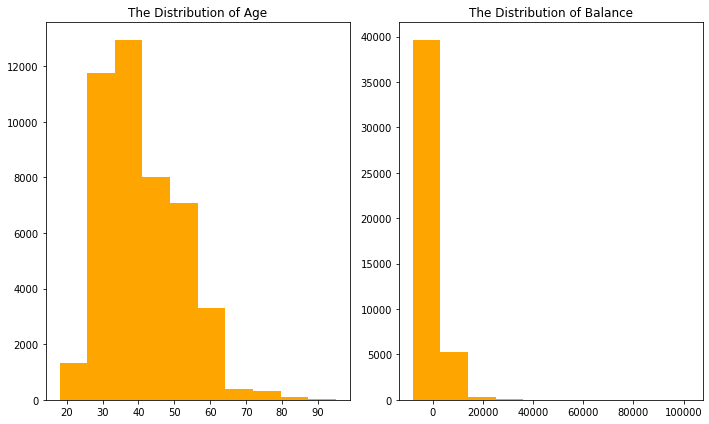

In [33]:
dist_age_balance = plt.figure(figsize = (10,6))
ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(d1['age'],color='orange')
ra1.set_title('The Distribution of Age')

ra2.hist(d1['balance'], color = 'orange')
ra2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

The distribution of age: In its telemarketing campaigns, clients called by the bank have an extensive age range, from 18 to 95 years old. However, a majority of customers called is in the age of 30s and 40s (33 to 48 years old fall within the 25th to 75th percentiles). The distribution of customer age is fairly normal with a small standard deviation.

The distribution of balance having a minimum of -8019 to a maximum of 102127  euros. The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers' balance levels.

# Visualize the relationship between 'age' and 'balance

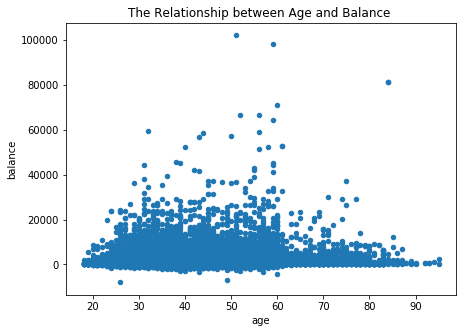

In [34]:
scatter_age_balance = d1.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()

Based on this scatter plot, there is no clear relationship between client’s age and balance level.

Nevertheless, over the age of 60, clients tend to have a significantly lower balance, mostly under 5,000 euros. This is due to the fact that most people retire after 60 and no longer have a reliable income source.

# Visualize the relationship between 'duration' & 'campaign' with respect to deposit

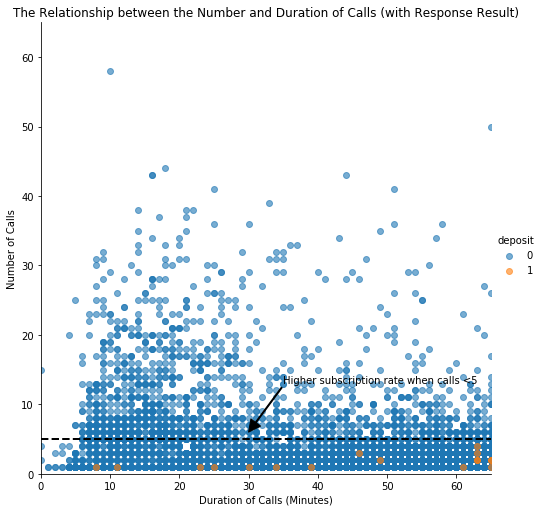

In [35]:
dur_cam = sns.lmplot(x='duration', y='campaign',data = d1,
                     hue = 'deposit',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))

plt.show()

In this scatter plot, clients not subscribed to term deposits are denoted as "0" while clients subscribed are denoted as "1". Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. More importantly, after five campaign calls, clients are more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 10 times. 

This suggests that the bank should resist calling a client for more than five times, which can be disturbing and increase dissatisfaction.

In [36]:
d1.drop(['education_un','job_un'],axis=1,inplace=True)

# Scatter matrix and Correlation matrix

In [156]:
num_col = ['int16','int32','int64','float16','float32','float64']

#Filter out variables with numeric datatypes
df_numcols_only5= d1.select_dtypes(include= num_col)
df_numcols_only5.drop(columns=['deposit'],axis=1,inplace=True)

In [157]:
corr_data = df_numcols_only5
corr = corr_data.corr()
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.089447,-0.009292,-0.033634,0.040172,-0.017421,-0.025499
balance,0.089447,1.000000,0.028636,0.033703,-0.018256,0.070765,0.053070
day,-0.009292,0.028636,1.000000,-0.037362,0.098733,-0.050017,-0.082465
duration,-0.033634,0.033703,-0.037362,1.000000,-0.071561,0.029902,0.025478
campaign,0.040172,-0.018256,0.098733,-0.071561,1.000000,-0.089031,-0.093580
pdays,-0.017421,0.070765,-0.050017,0.029902,-0.089031,1.000000,0.835455
previous,-0.025499,0.053070,-0.082465,0.025478,-0.093580,0.835455,1.000000


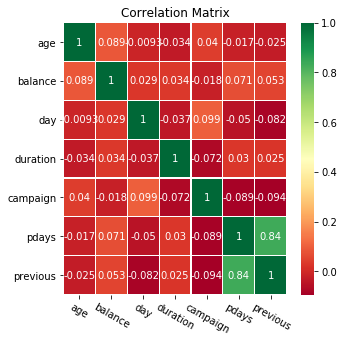

In [158]:
#corr_data = d1
#corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.1,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

The scatter matrix does not reveal any clear relationship among age, balance, duration and campaign.

To investigate more about correlation, a correlation matrix was plotted with all qualitative variables. Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, and “campaign”. Their influences on campaign outcome will be investigated further in the machine learning part.

# Visualize the subscription and contact rate by age

In [39]:
lst = [d1]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60


In [40]:
count_age_response_pct = pd.crosstab(d1['deposit'],d1['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

In [41]:
age = pd.DataFrame(d1['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct[1]
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

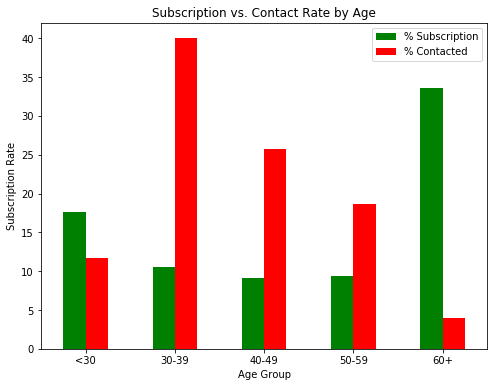

In [42]:
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

Insights: target the youngest and the oldest instead of the middle-aged

Green vertical bars indicate that clients with a age of 60+ have the highest subscription rate. About 17% of the subscriptions came from the clients aged between 18 to 29. More than 50% of the subscriptions are contributed by the youngest and the eldest clients.

It is not surprising to see such a pattern because the main investment objective of older people is saving for retirement while the middle-aged group tend to be more aggressive with a main objective of generating high investment income. Term deposits, as the least risky investment tool, are more preferable to the eldest.
The youngest may not have enough money or professional knowledge to engage in sophisticated investments, such as stocks and mutual funds. Term deposits provide liquidity and generate interest incomes that are higher than the regular saving account, so term deposits are ideal investments for students.


However, red vertical bars show that the bank focused its marketing efforts on the middle-aged group, which returned lower subscription rates than the younger and older groups. Thus, to make the marketing campaign more effective, the bank should target younger and older clients in the future.

# Visualize the subscription rate by balance level

In [43]:
lst = [d1]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'

In [44]:
count_balance_response_pct = pd.crosstab(d1['deposit'],d1['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [45]:
bal = pd.DataFrame(d1['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct[1]
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

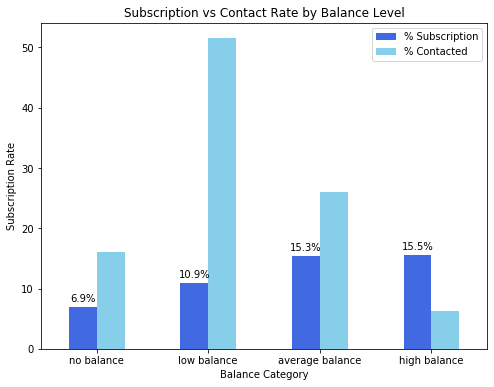

In [46]:
plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('royalblue','skyblue'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

Insights: target clients with average or high balance

To identify the trend more easily, clients are categorized into four groups based on their levels of balance:

#No Balance: clients with a negative balance.
#Low Balance: clients with a balance between 0 and 1000 euros.
#Average Balance: clients with a balance between 1000 and 5000 euros.
#High Balance: clients with a balance greater than 5000 euros.

Unsurprisingly, this bar chart indicates a positive correlation between clients’ balance levels and subscription rate. Clients with negative balances only returned a subscription rate of 6.9% while clients with average or high balances had significantly higher subscription rates, nearly 15%.

However, in this campaign, more than 50% of clients contacted only have a low balance level. In the future, the bank should shift its marketing focus to high-balance customers to secure more term deposits.

Visualizing the subscription rate by age and balance

In [47]:
d1['response']=d1['deposit']

In [48]:
d1['response'].replace(to_replace=[0,1],value=['no','yes'],inplace=True)

In [49]:
d1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group,balance_group,response
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,0,50.0,average balance,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,0,40.0,low balance,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,0,30.0,low balance,no
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,0,40.0,average balance,no
4,33,blue-collar,single,secondary,no,1,no,no,unknown,5,may,198,1,0,0,unknown,0,30.0,low balance,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,0,0,unknown,1,50.0,low balance,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,0,0,unknown,1,60.0,average balance,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,60.0,high balance,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,0,0,unknown,0,50.0,low balance,no


In [50]:
age_balance1 = pd.DataFrame(d1.groupby(['age_group','balance_group'])['deposit'].sum())
age_balance2 = pd.DataFrame(d1.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['deposit']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['deposit','response'],axis =1)

age_balance1 = age_balance1.unstack()

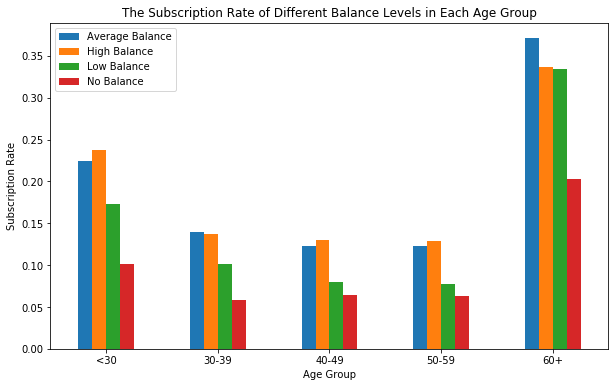

In [51]:
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()

Insights: target older clients with high balance levels




While age represents a person’s life stage and balance represents a person’s financial condition, jointly evaluating the impact of these two factors enables us to investigate if there is a common trend across all ages, and to identify which combination of client features indicates the highest likelihood of subscription.

In order to investigate the combined effect of age and balance on a client’s decision, we performed a two-layer grouping, segmenting customers according to their balance levels within each age group.

The graph tells the same story regarding the subscription rate for different age groups: the willingness to subscribe is exceptionally high for people aged above 60 and younger people aged below 30 also have a distinguishable higher subscription rate than those of other age groups.

Furthermore, the effect of balance levels on subscription decision is applicable to each individual age group: every age group shares a common trend that the percentage of subscription increases with balance.

n sum, the bank should prioritize its telemarketing to clients who are above 60 years old and have positive balances, because they have the highest acceptance rate of about 35%. The next group the bank should focus on is young clients with positive balances, who showed high subscription rates between 15% and 20%

# Visualize the subscription rate by job

In [52]:
count_job_response_pct = pd.crosstab(d1['response'],d1['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

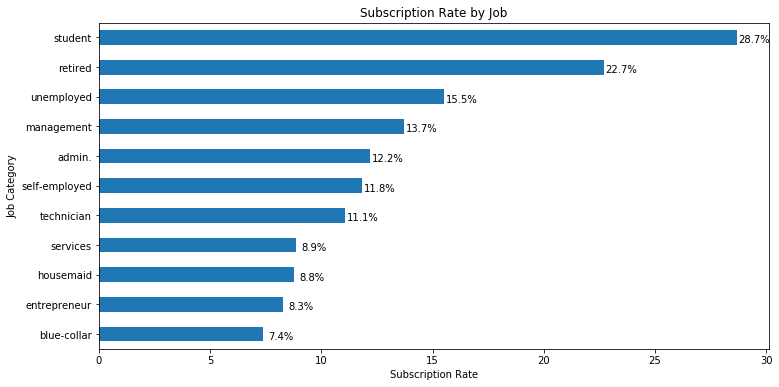

In [53]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

Insights: target students and retired clients

As noted from the horizontal bar chart, students and retired clients account for more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older.

# Visualizing the subscription and contact rate by month

In [54]:
#Change 'month' from words to numbers for easier analysis
lst = [d1]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

In [55]:
count_month_response_pct = pd.crosstab(d1['response'],d1['month_int']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()

In [56]:
month = pd.DataFrame(d1['month_int'].value_counts())
month['% Contacted'] = month['month_int']*100/month['month_int'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month_int',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)

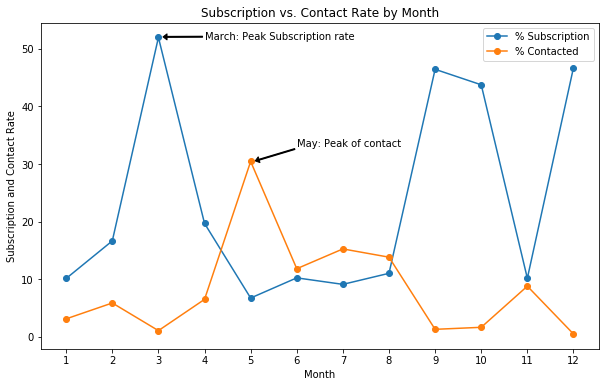

In [57]:
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

Insights: initiate the telemarketing campaign in fall or spring

Besides customer characteristics, external factors may also have an impact on the subscription rate, such as seasons and the time of calling. So the month of contact is also analyzed here.

This line chart displays the bank’s contact rate in each month as well as clients’ response rate in each month. One way to evaluate the effectiveness of the bank's marketing plan is to see whether these two lines have a similar trend over the same time horizon.

The bank contacted most clients between May and August. The highest contact rate is around 30%, which happened in May, while the contact rate is closer to 0 in March, September, October, and December.

However, the subscription rate showed a different trend. The highest subscription rate occurred in March, which is over 50%, and all subscription rates in September, October, and December are over 40%.
Clearly, these two lines move in different directions which strongly indicates the inappropriate timing of the bank’s marketing campaign. To improve the marketing campaign, the bank should consider initiating the telemarketing campaign in fall and spring when the subscription rate tends to be higher.

Nevertheless, the bank should be cautious when analyzing external factors. More data from previous marketing campaign should be collected and analyzed to make sure that this seasonal effect is constant over time and applicable to the future.

# Checking the normality of the features

In [58]:
d2=d1.drop(['age_group','balance_group','response','month_int'],axis=1,inplace=True)

In [59]:
d2=d1

In [60]:
d2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,0
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,0
4,33,blue-collar,single,secondary,no,1,no,no,unknown,5,may,198,1,0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,0,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,0,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,0,0,unknown,0


In [61]:
num_col = ['int16','int32','int64','float16','float32','float64']

#Filter out variables with numeric datatypes
df_numcols_only= d2.select_dtypes(include= num_col)
df_numcols_only.drop(columns=['deposit'],axis=1,inplace=True)

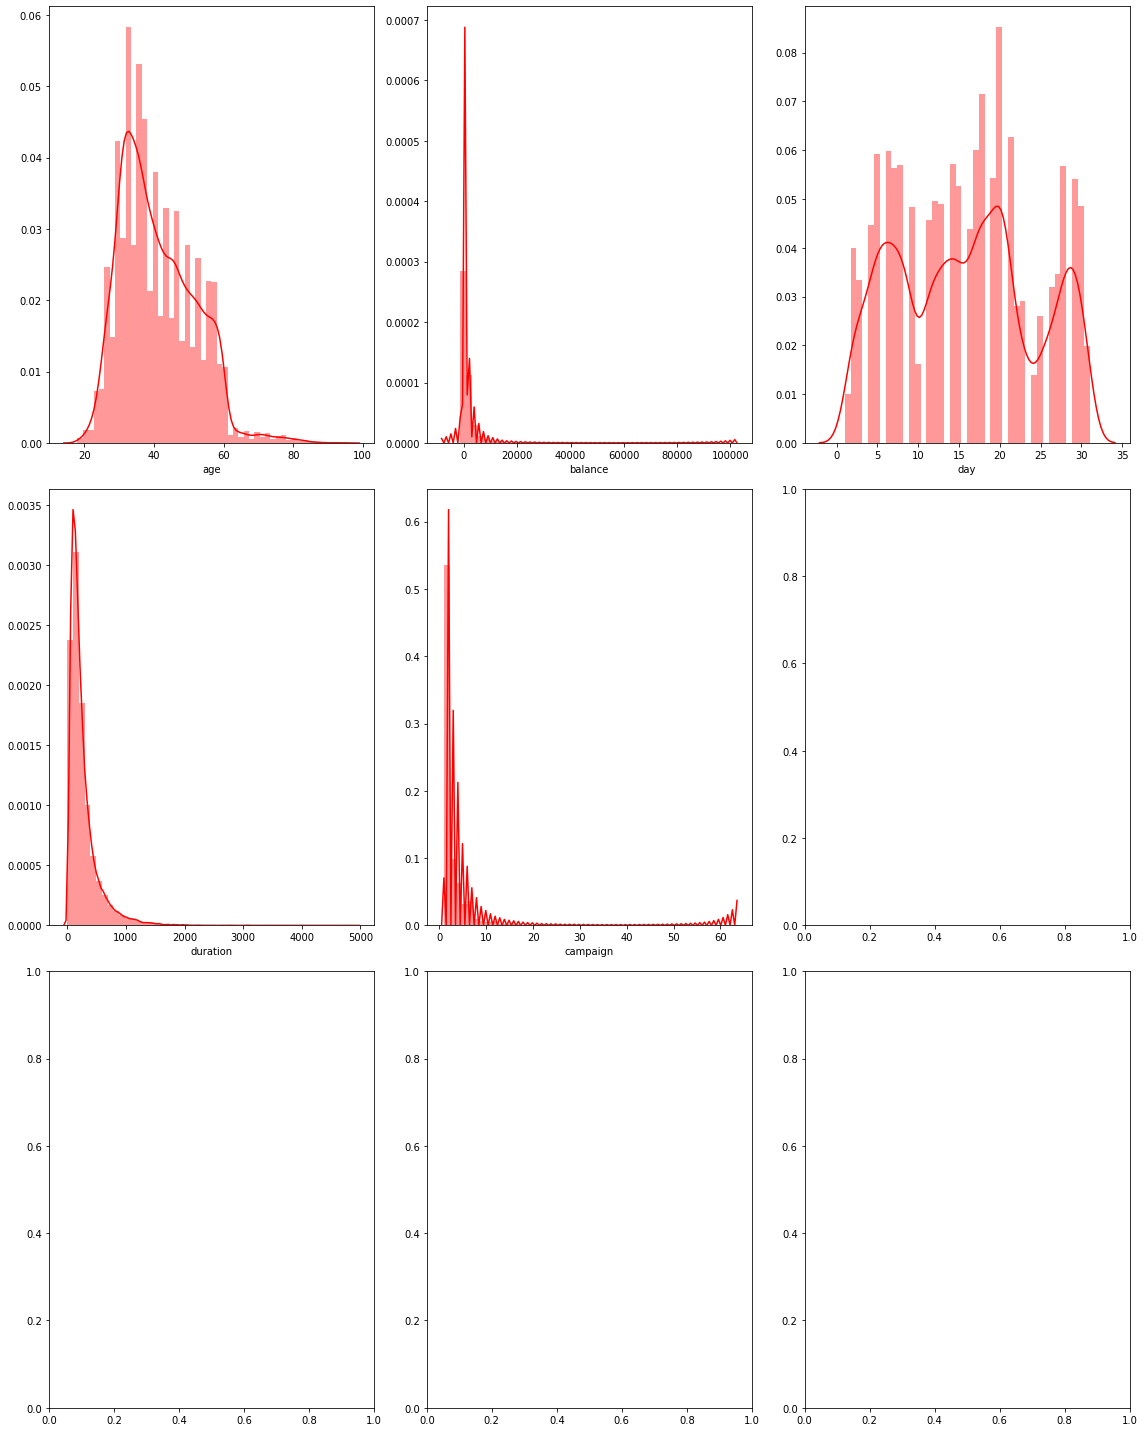

In [62]:
columns=['age', 'balance', 'day','duration','campaign']
fig,ax = plt.subplots(3,3,figsize=(16,20))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.distplot(d2[col],ax=ax[i],color='red')
plt.tight_layout()
plt.show()

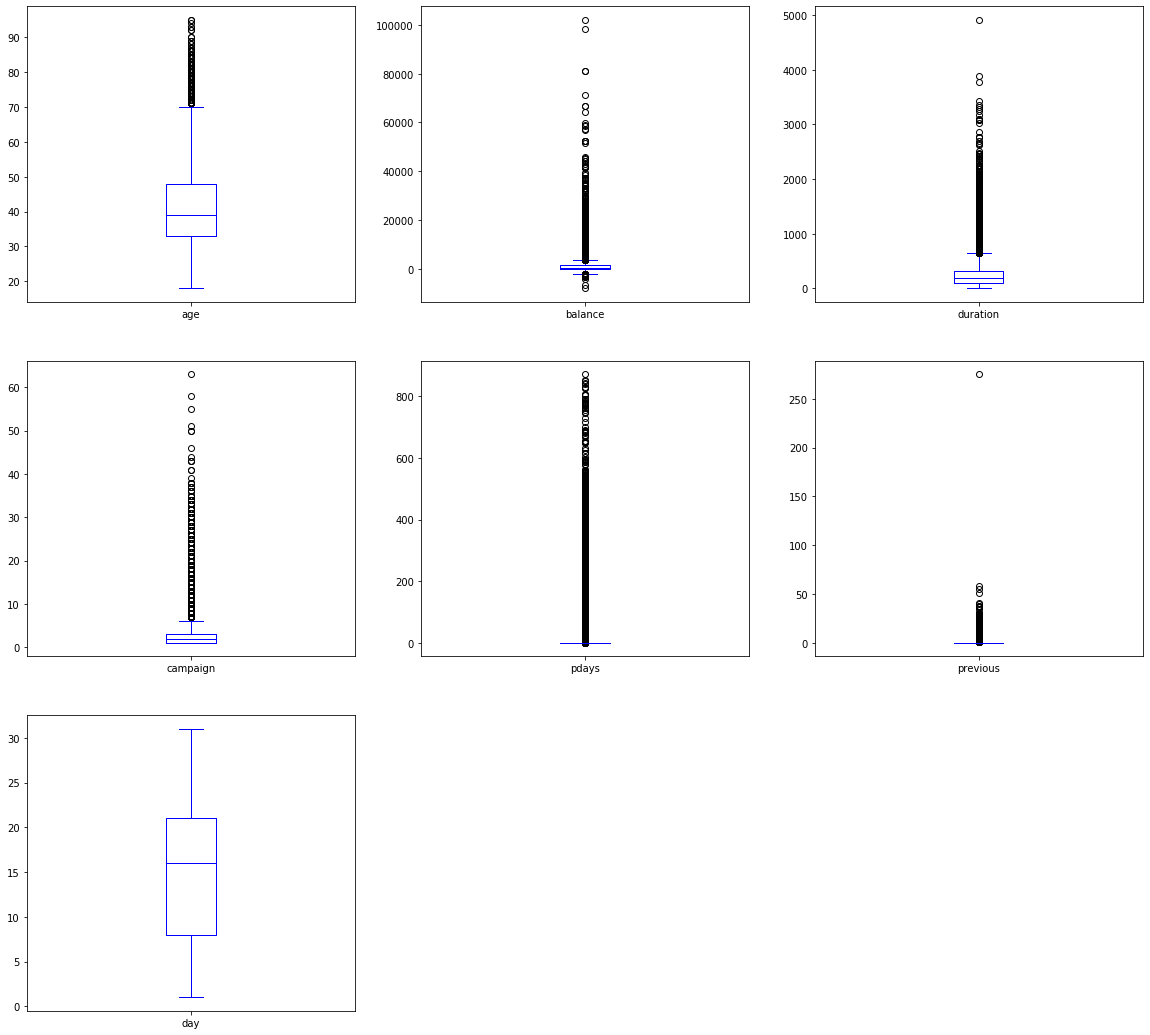

In [63]:
d2[['age','balance','duration','campaign','pdays','previous','day']].plot(kind= 'box' ,layout=(4,3),subplots=True, sharex=False, sharey=False, figsize=(20,25),color='blue')
plt.show()

# Outlyer Treatment and transformation

In [64]:
num_col = ['int16','int32','int64','float16','float32','float64']

#Filter out variables with numeric datatypes
df_numcols_only1= d2.select_dtypes(include= num_col)

In [65]:
df_numcols_only1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'deposit'],
      dtype='object')

In [66]:
d2['age']=zscore(d2['age'])
d2['balance']=zscore(d2['balance'])
d2['duration']=zscore(d2['duration'])
d2['campaign']=zscore(d2['campaign'])
d2['pdays']=zscore(d2['pdays'])
d2['previous']=zscore(d2['previous'])
d2['day']=zscore(d2['day'])

# KNN(Outlayer Treatment)

In [67]:
from sklearn.impute import KNNImputer

In [68]:
d2.loc[d2.age > 3, 'age'] = np.nan
numeric1=d2[['age']]
imputer = KNNImputer(missing_values=np.nan)
d2['age'] = imputer.fit_transform(numeric1)


d2.loc[d2.duration > 3, 'duration'] = np.nan
numeric2=d2[['duration']]
imputer = KNNImputer(missing_values=np.nan)
d2['duration'] = imputer.fit_transform(numeric2)


d2.loc[d2.campaign > 3, 'campaign'] = np.nan
numeric3=d2[['campaign']]
imputer = KNNImputer(missing_values=np.nan)
d2['campaign'] = imputer.fit_transform(numeric3)


d2.loc[d2.pdays > 3, 'pdays'] = np.nan
numeric4=d2[['pdays']]
imputer = KNNImputer(missing_values=np.nan)
d2['pdays'] = imputer.fit_transform(numeric4)


d2.loc[d2.previous > 3, 'previous'] = np.nan
numeric5=d2[['previous']]
imputer = KNNImputer(missing_values=np.nan)
d2['previous'] = imputer.fit_transform(numeric5)


d2.loc[d2.day > 3, 'day'] = np.nan
numeric6=d2[['day']]
imputer = KNNImputer(missing_values=np.nan)
d2['day'] = imputer.fit_transform(numeric6)

d2.loc[d2.balance > 3, 'balance'] = np.nan
numeric7=d2[['balance']]
imputer = KNNImputer(missing_values=np.nan)
d2['balance'] = imputer.fit_transform(numeric7)


d2.loc[d2.balance < -3, 'balance'] = np.nan
numeric8=d2[['balance']]
imputer = KNNImputer(missing_values=np.nan)
d2['balance'] = imputer.fit_transform(numeric8)

In [69]:
d2['age']=np.cbrt(d2['age'])
d2['balance']=np.cbrt(d2['balance'])
d2['duration']=np.cbrt(d2['duration'])
d2['campaign']=np.cbrt(d2['campaign'])
d2['pdays']=np.cbrt(d2['pdays'])
d2['previous']=np.cbrt(d2['previous'])
d2['day']=np.cbrt(d2['day'])

# After Outlyer Treatment (Checking for normality and outlyers)

In [70]:
num_col = ['int16','int32','int64','float16','float32','float64']

#Filter out variables with numeric datatypes
df_numcols_only1= d2.select_dtypes(include= num_col)
df_numcols_only1=df_numcols_only1.columns
df_numcols_only1

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'deposit'],
      dtype='object')

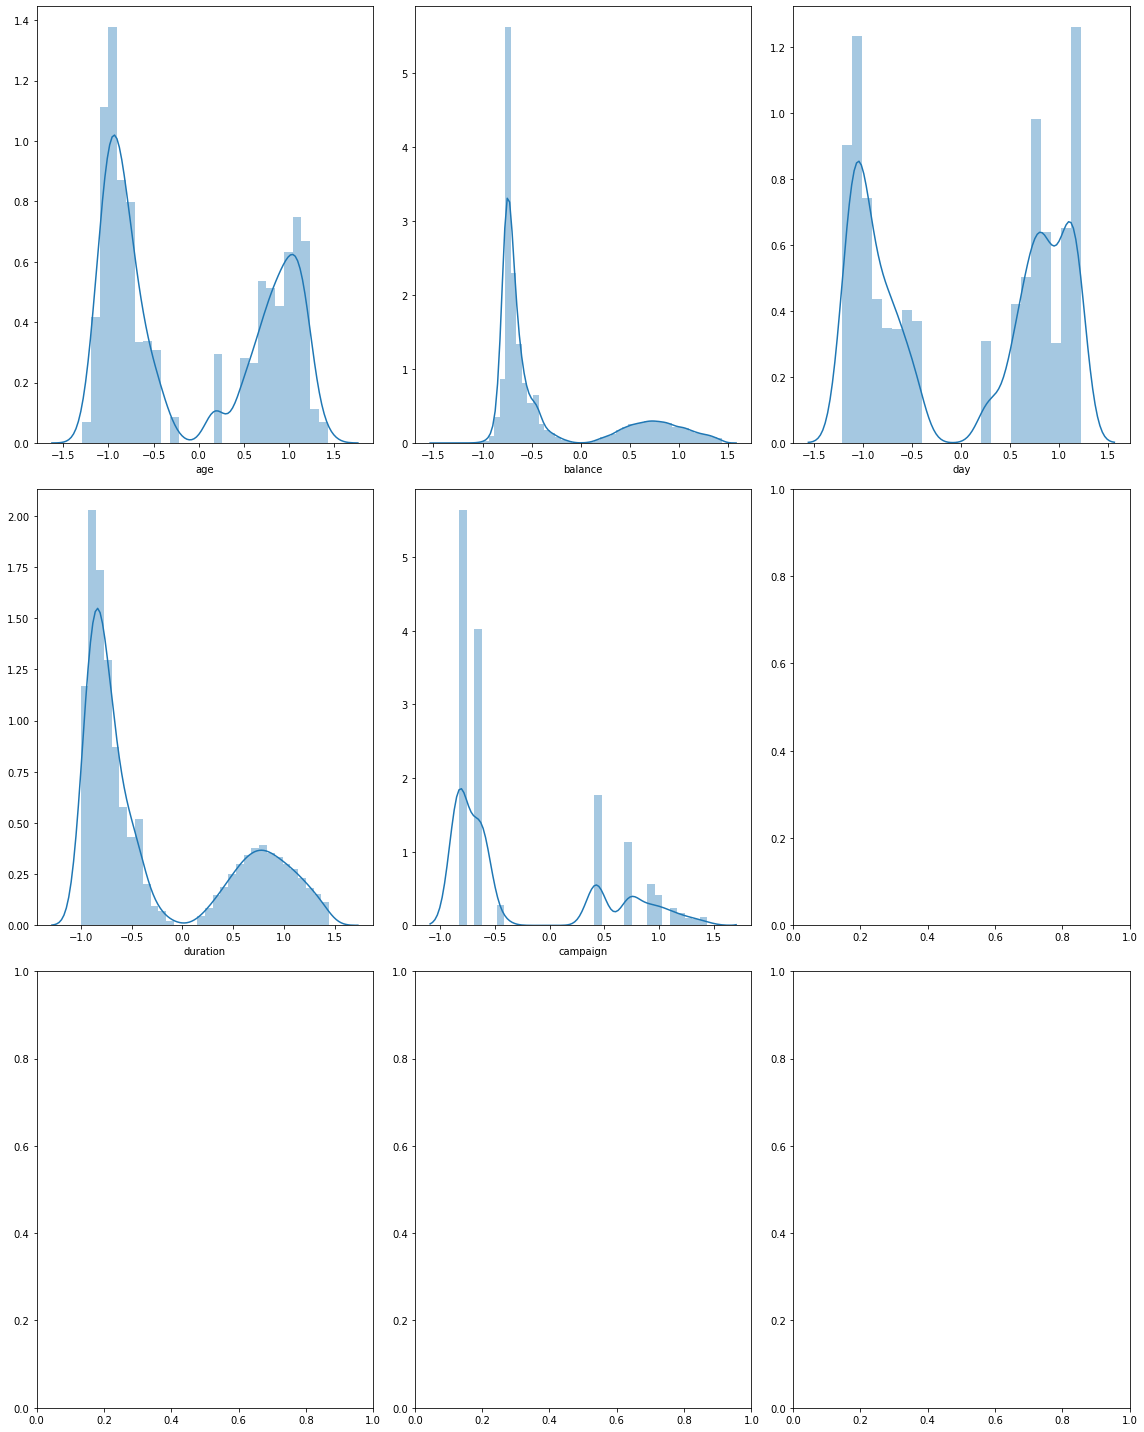

In [71]:
columns=['age', 'balance', 'day','duration','campaign']
fig,ax = plt.subplots(3,3,figsize=(16,20))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.distplot(d2[col],ax=ax[i])
plt.tight_layout()
plt.show()

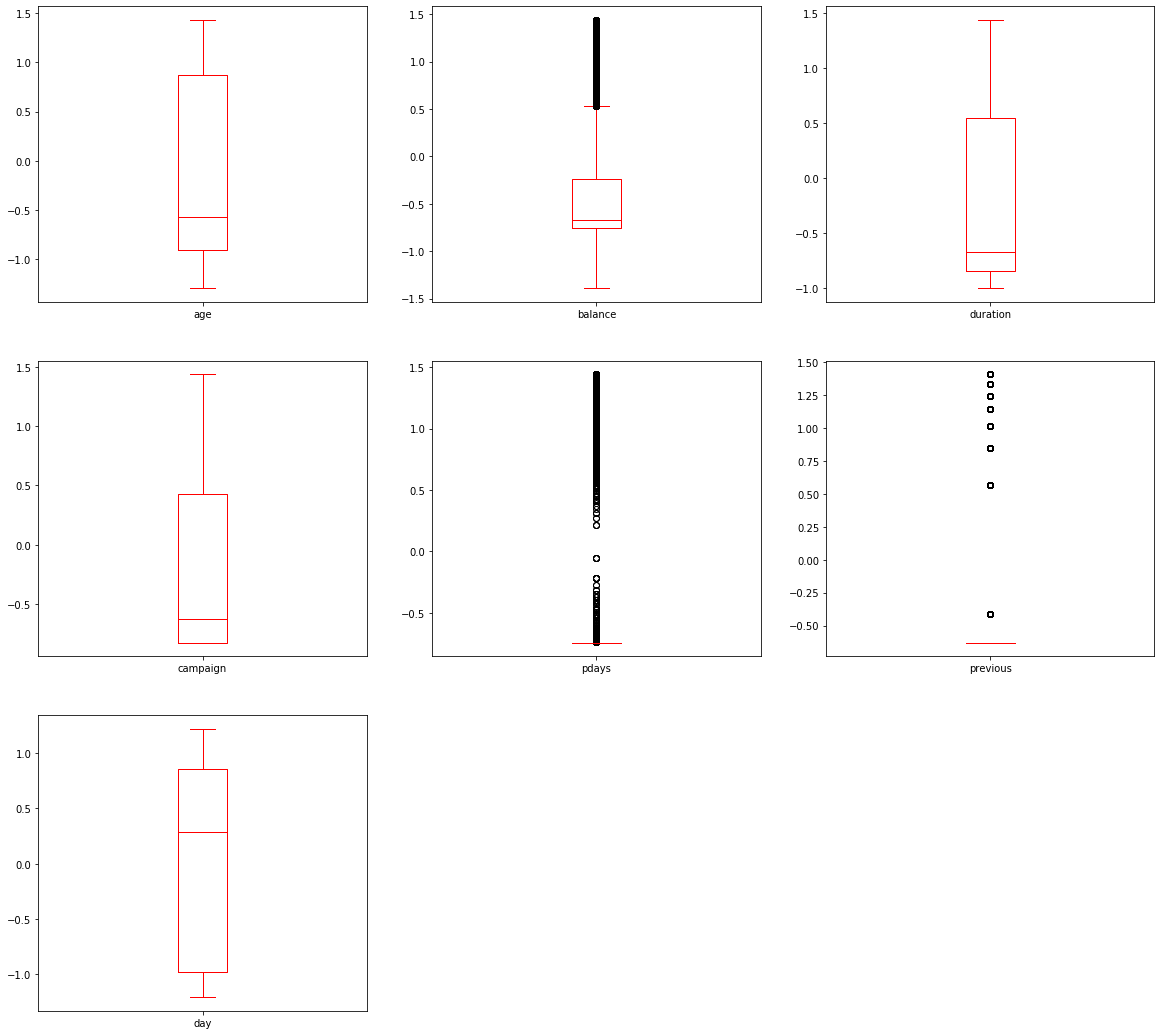

In [72]:
d2[['age','balance','duration','campaign','pdays','previous','day']].plot(kind= 'box' ,layout=(4,3),subplots=True, sharex=False, sharey=False, figsize=(20,25),color='red')
plt.show()

# Dummy Encoding

In [73]:
cat_col=['object']
df_catcols_only=d2.select_dtypes(include=cat_col)

In [74]:
df_numcols_only.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [75]:
d2=pd.get_dummies(data=d2,columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],drop_first=True)

In [76]:
d2

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.171302,0.635307,-1.090966,0.222506,-0.828819,-0.743505,-0.631586,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.660790,-0.759375,-1.090966,-0.746578,-0.828819,-0.743505,-0.631586,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.907503,-0.764467,-1.090966,-0.891005,-0.828819,-0.743505,-0.631586,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,0.829644,0.361408,-1.090966,-0.864115,-0.828819,-0.743505,-0.631586,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,-0.907503,-0.764655,-1.090966,-0.615891,-0.828819,-0.743505,-0.631586,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.982270,-0.560895,0.523441,1.408003,0.424009,-0.743505,-0.631586,1,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,1.414680,0.493854,0.523441,0.915861,-0.627058,-0.743505,-0.631586,1,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,1.430195,1.126516,0.523441,-0.455673,0.897032,1.127367,1.016549,1,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,1.147959,-0.610933,0.523441,0.989948,0.736204,-0.743505,-0.631586,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [77]:
d3=d2
d3

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.171302,0.635307,-1.090966,0.222506,-0.828819,-0.743505,-0.631586,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.660790,-0.759375,-1.090966,-0.746578,-0.828819,-0.743505,-0.631586,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.907503,-0.764467,-1.090966,-0.891005,-0.828819,-0.743505,-0.631586,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,0.829644,0.361408,-1.090966,-0.864115,-0.828819,-0.743505,-0.631586,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,-0.907503,-0.764655,-1.090966,-0.615891,-0.828819,-0.743505,-0.631586,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.982270,-0.560895,0.523441,1.408003,0.424009,-0.743505,-0.631586,1,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,1.414680,0.493854,0.523441,0.915861,-0.627058,-0.743505,-0.631586,1,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,1.430195,1.126516,0.523441,-0.455673,0.897032,1.127367,1.016549,1,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,1.147959,-0.610933,0.523441,0.989948,0.736204,-0.743505,-0.631586,0,1,0,...,0,0,0,0,1,0,0,0,0,1


# Statistical Analysis

In [78]:
from scipy.stats import ttest_ind

In [79]:
num_col = ['int16','int32','int64','float16','float32','float64']

#Filter out variables with numeric datatypes
df_numcols_only1= d1.select_dtypes(include= num_col)
df_numcols_only1.drop('deposit',axis=1,inplace=True)

In [80]:
cat_col=['object']
df_catcols_only1=d1.select_dtypes(include=cat_col)

In [81]:
df_numcols_only1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [82]:
df_catcols_only1.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [83]:
def chisquare_test(target_variable, categorical_column):
    print('H0: There is NO association between ' + target_variable.name + ' and ' + categorical_column.name)
    print('Ha: There is an association between ' + target_variable.name + ' and ' + categorical_column.name)
    print()
    ct = pd.crosstab(target_variable, categorical_column)
    print(ct)
    chi2_ct = stats.chi2_contingency(ct)
    chival = chi2_ct[0]
    pval = chi2_ct[1]
    print()
    print('chi-val =', chival)
    print('p-val =', pval)
    print()
    rejectH0 = pval < 0.05
    if rejectH0:
        print('Reject H0')
    else:
        print('Failed to reject H0')
    print()
    print('---------------------------------------------------------------')
    return rejectH0

In [84]:
def two_sample_ttest(target_variable, numerical_column):
    print('H0: The mean of ' + numerical_column.name + ' is equal for both categories of ' + target_variable.name)
    print('Ha: The mean of ' + numerical_column.name + ' is NOT equal for both categories of ' + target_variable.name)
    print()
    grp0 = numerical_column[target_variable == 0]
    grp1 = numerical_column[target_variable == 1]
    ttest = stats.ttest_ind(grp0, grp1)
    print(ttest)
    rejectH0 = ttest[1] < 0.05
    print()
    #return rejectH0
    if rejectH0:
        print('Reject H0')
        print('\n')
        print('-------------------------------------------------------------------------')
    else:
        print('Failed to Reject H0')         
        print()
        print('-------------------------------------------------------------------------')

In [85]:
num_cols = ['age','balance','day', 'duration', 'campaign', 'pdays', 'previous']

reject = []
not_reject = []
for col in num_cols:
    rejectH0 = two_sample_ttest(d1['deposit'], d1[col])
    
    if rejectH0:
        reject.append(col)
    else:
        not_reject.append(col)
    
print('Columns Fails to reject H0 :', reject)

print()
print('Columns Reject H0 :', not_reject)

H0: The mean of age is equal for both categories of deposit
Ha: The mean of age is NOT equal for both categories of deposit

Ttest_indResult(statistic=3.9097123776304015, pvalue=9.25408389720676e-05)

Reject H0


-------------------------------------------------------------------------
H0: The mean of balance is equal for both categories of deposit
Ha: The mean of balance is NOT equal for both categories of deposit

Ttest_indResult(statistic=-17.842168444656142, pvalue=5.829183889186829e-71)

Reject H0


-------------------------------------------------------------------------
H0: The mean of day is equal for both categories of deposit
Ha: The mean of day is NOT equal for both categories of deposit

Ttest_indResult(statistic=7.522423337463435, pvalue=5.476390539966425e-14)

Reject H0


-------------------------------------------------------------------------
H0: The mean of duration is equal for both categories of deposit
Ha: The mean of duration is NOT equal for both categories of dep

In [86]:
cat_cols = ['job', 'marital','education','contact','month','poutcome','default','housing','loan']
reject = []
not_reject = []

for col in cat_cols:
    chisquare_test(d1['deposit'], d1[col])
    if rejectH0:
        reject.append(col)
    else:
        not_reject.append(col)
print()   
print('Columns Fails to Reject H0 :', reject)
print()
print('Columns Rejected H0 :', not_reject)

H0: There is NO association between deposit and job
Ha: There is an association between deposit and job

job      admin.  blue-collar  entrepreneur  housemaid  management  retired  \
deposit                                                                      
0          4540         9212          1364       1131        8204     1767   
1           631          736           123        109        1304      519   

job      self-employed  services  student  technician  unemployed  
deposit                                                            
0                 1392      3785      669        6757        1101  
1                  187       369      269         840         202  

chi-val = 826.806211759172
p-val = 3.5547437743574746e-171

Reject H0

---------------------------------------------------------------
H0: There is NO association between deposit and marital
Ha: There is an association between deposit and marital

marital  divorced  married  single
deposit                   

# Splitting the data

In [87]:
X1=d3.drop(columns=['deposit'],axis=1)
y1=d3['deposit']

In [88]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X1, y1, test_size=0.3, random_state=1)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(31647, 40)
(13564, 40)
(31647,)
(13564,)


In [89]:
import statsmodels.api as sm

In [90]:
logit_model=sm.Logit(ytrain,Xtrain)
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.262852
         Iterations 8


In [91]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                deposit   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31607
Method:                           MLE   Df Model:                           39
Date:                Sat, 30 May 2020   Pseudo R-squ.:                  0.2762
Time:                        16:38:37   Log-Likelihood:                -8318.5
converged:                       True   LL-Null:                       -11493.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0715      0.027     -2.649      0.008      -0.124      -0.019
balance                 0.1989      0.030      6.629      0.000       0.140       0.258
day                    -0.0081      0.025     -0.322      0.747      -0.057       0.041
duration                1.2440      0.026     47.893      0.000       1.193       1.295
campaign               -0.1139      0.032     -3.593      0.000      -0.176      -0.052
pdays                  -0.3134      0.056     -5.601      0.000      -0.423      -0.204
previous               -0.3333      0.086     -3.895      0.000      -0.501      -0.166
job_blue-collar        -0.4491      0.074     -6.043      0.000      -0.595      -0.303
job_entrepreneur       -0.6745      0.144     -4.694      0.000      -0.956      -0.393
job_housemaid          -0.5616      0.149     -3.764      0.000      -0.854      -0.269
job_management         -0.3105      0.080     -3.861      0.000      -0.468      -0.153
job_retired             0.0961      0.096      0.999      0.318      -0.093       0.285
job_self-employed      -0.4518      0.126     -3.598      0.000      -0.698      -0.206
job_services           -0.2941      0.090     -3.273      0.001      -0.470      -0.118
job_student             0.2226      0.122      1.824      0.068      -0.017       0.462
job_technician         -0.3245      0.075     -4.340      0.000      -0.471      -0.178
job_unemployed         -0.3475      0.123     -2.814      0.005      -0.589      -0.105
marital_married        -0.3682      0.061     -6.063      0.000      -0.487      -0.249
marital_single         -0.1338      0.070     -1.924      0.054      -0.270       0.003
education_secondary    -0.0317      0.063     -0.501      0.616      -0.156       0.092
education_tertiary      0.2256      0.078      2.874      0.004       0.072       0.379
default_yes            -0.3121      0.195     -1.601      0.109      -0.694       0.070
housing_yes            -0.6405      0.047    -13.641      0.000      -0.732      -0.548
loan_yes               -0.3546      0.067     -5.330      0.000      -0.485      -0.224
contact_telephone      -0.1795      0.084     -2.146      0.032      -0.343      -0.016
contact_unknown        -1.2760      0.080    -15.991      0.000      -1.432      -1.120
month_aug              -0.8550      0.085    -10.046      0.000      -1.022      -0.688
month_dec               0.5279      0.212      2.488      0.013       0.112       0.944
month_feb              -0.4296      0.097     -4.415      0.000      -0.620      -0.239
month_jan              -1.2221      0.133     -9.208      0.000      -1.482      -0.962
month_jul              -0.8643      0.083    -10.430      0.000      -1.027      -0.702
month_jun               0.1675      0.101      1.665      0.096      -0.030       0.365
month_mar               1.2526      0.144      8.712      0.000       0.971       1.534
month_may              -0.6377      0.078     -8.198      0.000      -0.7

# Removing features which are having p>0.05

checked the p-values of the features p>0.05 by removing individual features having p>0.05 but changes in the p-value reduction is not observed. So, removing the features all at a time

In [92]:
X1.drop(columns=['day','previous','job_retired','marital_single','education_secondary','default_yes','contact_telephone','poutcome_other'],axis=1,inplace=True)

# Check For Multicollinearity

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
vif= pd.DataFrame()
vif['Features'] = X1.columns
vif['vif']=[variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])]
vif

,Features,vif
0,age,1.190311
1,balance,1.318112
2,duration,1.139257
3,campaign,1.195000
4,pdays,5.924280
5,job_blue-collar,2.278546
6,job_entrepreneur,1.242791
7,job_housemaid,1.158420
8,job_management,3.137892
9,job_self-employed,1.252947


In [95]:
vif[vif['vif']>4]

,Features,vif
4,pdays,5.924280
26,month_may,4.532201
31,poutcome_unknown,18.692998


# As only three features are having vif>4 inferes that there is less multicollinearity in the data

# Removing features having vif>4

In [96]:
X1.drop(['poutcome_unknown','month_may'],axis=1,inplace=True)

In [97]:
vif= pd.DataFrame()
vif['Features'] = X1.columns
vif['vif']=[variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])]
vif

,Features,vif
0,age,1.190180
1,balance,1.304806
2,duration,1.136225
3,campaign,1.183320
4,pdays,2.077427
5,job_blue-collar,2.001926
6,job_entrepreneur,1.210994
7,job_housemaid,1.125237
8,job_management,2.942368
9,job_self-employed,1.214322


In [98]:
vif[vif['vif']>4]

,Features,vif


In [99]:
X1

,age,balance,duration,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_self-employed,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_nov,month_oct,month_sep,poutcome_success
0,1.171302,0.635307,0.222506,-0.828819,-0.743505,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.660790,-0.759375,-0.746578,-0.828819,-0.743505,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.907503,-0.764467,-0.891005,-0.828819,-0.743505,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.829644,0.361408,-0.864115,-0.828819,-0.743505,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.907503,-0.764655,-0.615891,-0.828819,-0.743505,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.982270,-0.560895,1.408003,0.424009,-0.743505,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45207,1.414680,0.493854,0.915861,-0.627058,-0.743505,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45208,1.430195,1.126516,-0.455673,0.897032,1.127367,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45209,1.147959,-0.610933,0.989948,0.736204,-0.743505,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [100]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X1, y1, test_size=0.3, random_state=1)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(31647, 30)
(13564, 30)
(31647,)
(13564,)


In [101]:
Xtest

,age,balance,duration,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_self-employed,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_nov,month_oct,month_sep,poutcome_success
3610,0.464439,0.724259,0.246068,0.736204,-0.743505,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11677,-0.718351,0.652727,-0.707402,-0.627058,-0.743505,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
33018,-0.944122,-0.524479,1.296201,0.736204,-0.743505,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44323,1.043450,-0.702655,0.795902,0.424009,1.119427,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8119,-0.944122,-0.713357,-0.663328,0.897032,-0.743505,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10811,-0.567058,0.557906,-0.755754,-0.828819,-0.743505,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
28752,0.829644,0.720272,-0.413165,-0.828819,-0.743505,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
22657,-0.978101,-0.764842,-0.638906,0.897032,-0.743505,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12529,0.948594,-0.763905,-0.968798,-0.828819,-0.743505,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [102]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
print('Training score =', model1.score(Xtrain, ytrain))
print('Test score =', model1.score(Xtest, ytest))

Training score = 0.8974942332606566
Test score = 0.8991447950457092


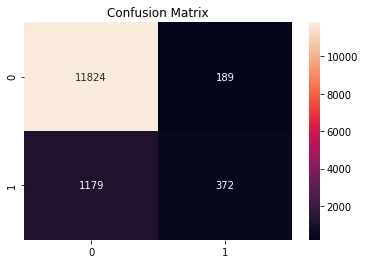

In [104]:
from sklearn.metrics import confusion_matrix
ypred = model1.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [105]:
from sklearn.metrics import confusion_matrix, f1_score
ypred = model1.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
acc = accuracy_score(ytest,ypred)
print('Confusion Matrix: ')
print(cm)
print('Overall accuracy_score: ',acc)

Confusion Matrix: 
[[11824   189]
 [ 1179   372]]
Overall accuracy_score:  0.8991447950457092


In [106]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.8991447950457092
Precision = 0.6631016042780749
Recall = 0.23984526112185686
F1 Score = 0.35227272727272724


ROC AUC = 0.8533179964129767


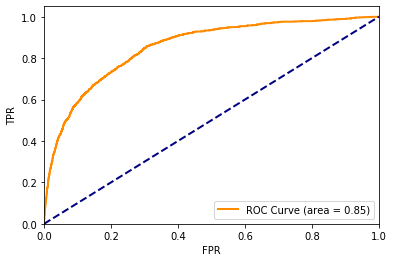

In [107]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = model1.predict_proba(Xtest)
fpr,tpr,threshold = roc_curve(ytest,ypred[:,1])
roc_auc = roc_auc_score(ytest,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
#plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Data Imbalance in the Target Varaible

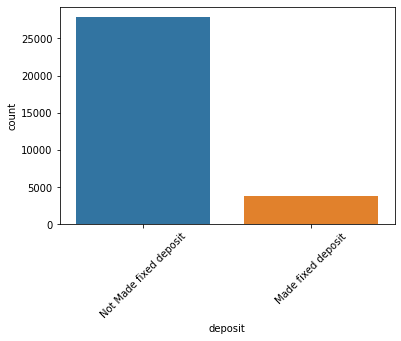

0    27909
1     3738
Name: deposit, dtype: int64


In [108]:
sns.countplot(ytrain)
plt.xticks(np.arange(2),('Not Made fixed deposit','Made fixed deposit'),rotation=45)
plt.show()
print(ytrain.value_counts())

In [109]:
didnt = len(d3[d3['deposit'] == 0])
did = len(d3[d3['deposit'] == 1])
total = didnt + did

per_didnt = (didnt / total) * 100
per_did = (did / total) * 100

print(per_didnt)
print(per_did)

88.30151954170445
11.698480458295547


The data is not balanced with approximately 90 and 10 percent .But we can do oversampling. This infers that the target variable is not evenly distributed

# Oversampling the target variable by using SMOTE

Using TensorFlow backend.


(45211, 30)
(79844, 30)


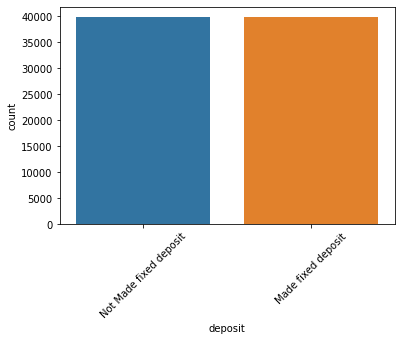

In [110]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

X_resampled, y_resampled = sm.fit_sample(X1, y1)

X_resampled = pd.DataFrame(X_resampled, columns=X1.columns)

print(X1.shape)
print(X_resampled.shape)

sns.countplot(y_resampled)
plt.xticks(np.arange(2),('Not Made fixed deposit','Made fixed deposit'),rotation=45)
plt.show()

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(55890, 30)
(23954, 30)
(55890,)
(23954,)


In [112]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
print('Training score =', model1.score(X_train, y_train))
print('Test score =', model1.score(X_test, y_test))

Training score = 0.8060833780640544
Test score = 0.8059614260666277


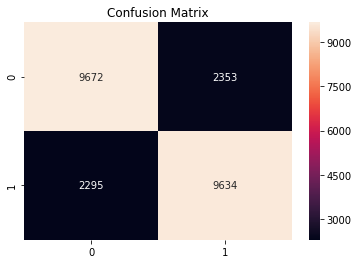

In [114]:
from sklearn.metrics import confusion_matrix
ypred = model1.predict(X_test)
cm = confusion_matrix(y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [115]:
from sklearn.metrics import confusion_matrix, f1_score
ypred = model1.predict(X_test)
cm = confusion_matrix(y_test, ypred)
acc = accuracy_score(y_test,ypred)
print('Confusion Matrix:')
print(cm)
print('Overall accuracy_score: ',acc)

Confusion Matrix:
[[9672 2353]
 [2295 9634]]
Overall accuracy_score:  0.8059614260666277


In [116]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.8059614260666277
Precision = 0.8037040126804038
Recall = 0.8076117025735602
F1 Score = 0.8056531192507109


ROC AUC = 0.8296846157904479


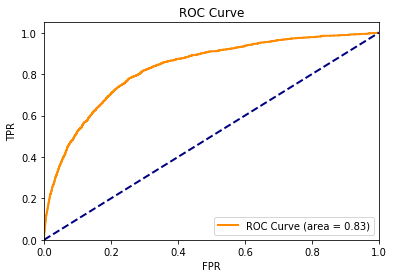

In [120]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = model1.predict_proba(Xtest)
fpr,tpr,threshold = roc_curve(ytest,ypred[:,1])
roc_auc = roc_auc_score(ytest,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [122]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(5,30),'weights':['uniform','distance']}
GS=RandomizedSearchCV(knn,param,cv=3,scoring='f1_weighted',n_jobs=-1)
GS.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1_weighted', verbose=0)

In [123]:
GS.best_params_

{'weights': 'distance', 'n_neighbors': 7}

In [124]:
dt=DecisionTreeClassifier(random_state=0)

In [125]:
param={'max_depth':np.arange(3,50),'criterion':['entropy','gini'],'min_samples_leaf':np.arange(3,20)}
GS=RandomizedSearchCV(dt,param,cv=3,scoring='f1_weighted')
GS.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=0,
             

In [126]:
GS.best_params_

{'min_samples_leaf': 7, 'max_depth': 12, 'criterion': 'gini'}

In [127]:
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=9,weights='distance')
DT=DecisionTreeClassifier(criterion='entropy',max_depth=17,min_samples_leaf=44,random_state=0)
RF=RandomForestClassifier(criterion='entropy',n_estimators=13,random_state=0)
Bag=BaggingClassifier(n_estimators=8,random_state=0)
AB=AdaBoostClassifier(n_estimators=90,random_state=0)
#ABL=AdaBoostClassifier(base_estimator=LR,n_estimators=50,random_state=0)
GB=GradientBoostingClassifier(n_estimators=98)
#svm=SVC(C=10,gamma=0.001,kernel='rbf')
stacked = StackingClassifier(classifiers=[Bag,RF,AB], meta_classifier=KNN)

In [128]:
RF_var=[]
for val in np.arange(1,50):
  RF=RandomForestClassifier(criterion='gini',n_estimators=val,random_state=0)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  cv_results = model_selection.cross_val_score(RF, X_train,y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
  RF_var.append(np.var(cv_results,ddof=1))
  

In [129]:
RF_var[0:10]

[7.40322514334022e-06,
 9.842550879355978e-06,
 2.366432837282443e-06,
 1.001118154416349e-06,
 1.4492890281490302e-06,
 3.9033118750282184e-06,
 2.6294062960713703e-06,
 1.51230996915923e-06,
 2.1359435560515684e-06,
 3.5452461146648304e-07]

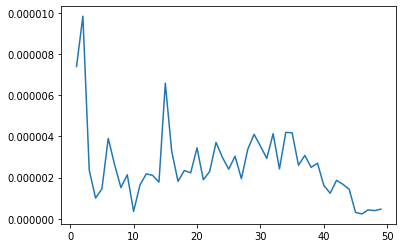

In [130]:
x_axis=np.arange(1,50)
plt.plot(x_axis,RF_var)

In [131]:
np.argmin(RF_var)

45

In [132]:
Bag_var=[]
for val in np.arange(1,20):
  Bag=BaggingClassifier(n_estimators=val,random_state=0)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  cv_results = model_selection.cross_val_score(Bag, X_train,y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
  Bag_var.append(np.var(cv_results,ddof=1))
  print(val,np.var(cv_results,ddof=1))

1 5.238540813137715e-06
2 2.3952089451451612e-06
3 7.840515696016825e-06
4 6.069136131416454e-06
5 9.991686657739887e-06
6 5.4801014879231035e-06
7 7.72348353777197e-06
8 1.176637480919742e-05
9 7.973773738592871e-06
10 3.038334201663786e-06
11 6.523555026594144e-06
12 7.8529901527683e-06
13 6.438451698284355e-06
14 4.4880708150386425e-06
15 4.3532020266868264e-06
16 8.439361907593817e-06
17 1.1220963427192819e-05
18 8.509607213866901e-06
19 7.755012438808543e-06


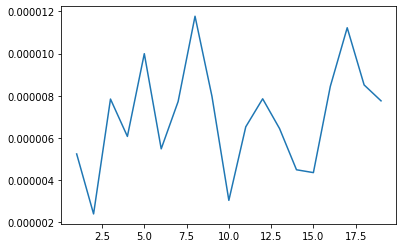

In [133]:
x_axis=np.arange(1,20)
plt.plot(x_axis,Bag_var)

In [134]:
np.argmin(Bag_var)

1

In [135]:
Ada_bias=[]
for val in np.arange(1,100):
  Ada=AdaBoostClassifier(n_estimators=val,random_state=0)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  cv_results = model_selection.cross_val_score(Ada, X_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
  Ada_bias.append(1-np.mean(cv_results))
  print(val,1-np.mean(cv_results))


1 0.30028482076592367
2 0.24983092114687944
3 0.24296968964752708
4 0.24383612435138868
5 0.2228904381469219
6 0.21981491635518646
7 0.2017707348613338
8 0.20823069964551644
9 0.2155289543662553
10 0.19784900318619592
11 0.18941161965175957
12 0.20607520662331946
13 0.2005964483696211
14 0.19559307425968608
15 0.18664546559194983
16 0.18143688287192195
17 0.17863932871223132
18 0.17672539095025241
19 0.17215605799684164
20 0.1743862718467296
21 0.16940470282662956
22 0.17060374723733418
23 0.16746036298085432
24 0.16280387711999866
25 0.16413894314911115
26 0.16214015663382542
27 0.16113710946054416
28 0.15759081212863346
29 0.1542638146202684
30 0.15861773237582877
31 0.1530508422907081
32 0.1563454200579003
33 0.15529611775585028
34 0.15319585195377738
35 0.15198338031330805
36 0.15092548667634764
37 0.15015460126146352
38 0.1493516299843738
39 0.14942761335987365
40 0.14853680090563426
41 0.14614105472976602
42 0.14635764538323048
43 0.1445939986190945
44 0.14348719453195435
45 0.14

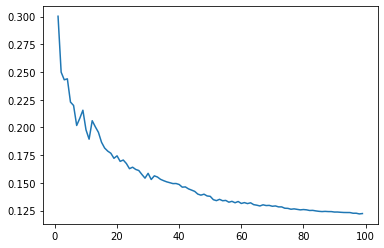

In [136]:
x_axis=np.arange(1,100)
plt.plot(x_axis,Ada_bias)

In [137]:
np.argmin(Ada_bias)

97

In [138]:
GB_bias=[]
for val in np.arange(1,100):
  gb=GradientBoostingClassifier(n_estimators=val)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  cv_results = model_selection.cross_val_score(gb, X_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
  GB_bias.append(1-np.mean(cv_results))
  print(val,1-np.mean(cv_results))


1 0.23461680256236905
2 0.230012225645699
3 0.22533460112463677
4 0.22316584703242814
5 0.22019577494994313
6 0.21693314985878798
7 0.2126175578957522
8 0.21122827142336698
9 0.2089720234606659
10 0.20853306308169284
11 0.20556102109370888
12 0.2030591849760609
13 0.2003029695506443
14 0.19823375374327445
15 0.19682857807501086
16 0.19417718627554326
17 0.19094696767580777
18 0.18693267723285756
19 0.18052070552927912
20 0.1787911726801804
21 0.17425901742499017
22 0.1718079942747387
23 0.17054766120247422
24 0.16931068224493107
25 0.16855137345643334
26 0.16657241226424968
27 0.16464491057179853
28 0.16413946882355235
29 0.1626046092302812
30 0.1604012444350854
31 0.15868503120344124
32 0.1580802767977061
33 0.15694188288512045
34 0.15590380479991894
35 0.1554576715257907
36 0.153500745418504
37 0.15236643029547947
38 0.1516241975731184
39 0.15053327953538398
40 0.15041374338864555
41 0.1487314372727454
42 0.14757631068904054
43 0.14757770949212246
44 0.1469556016817798
45 0.146407371

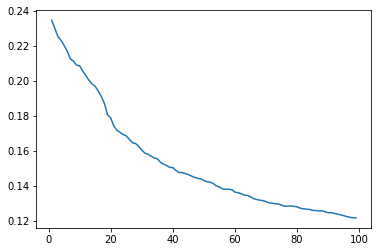

In [139]:
x_axis=np.arange(1,100)
plt.plot(x_axis,GB_bias)

In [140]:
np.argmin(GB_bias)

98

In [141]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN))
models.append(('DecisionTree',DT))
models.append(('RandomForest',RF))
models.append(('BaggingClassifier',Bag))
models.append(('AdaBoost',AB))
models.append(('GBoost',GB))
models.append(('Stacked',stacked))

Logistic: 0.805588 (0.000008)
NaiveBayes: 0.728463 (0.000042)
KNN: 0.862365 (0.000016)
DecisionTree: 0.861958 (0.000012)
RandomForest: 0.918905 (0.000000)
BaggingClassifier: 0.904483 (0.000008)
AdaBoost: 0.876310 (0.000007)
GBoost: 0.878297 (0.000004)
Stacked: 0.912532 (0.000006)


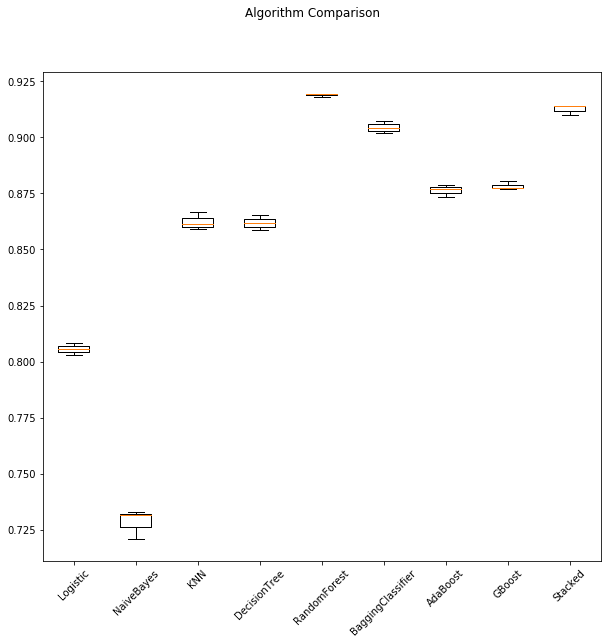

In [142]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure(figsize=(10,9))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=45)
plt.show()

In [143]:
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=49,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [144]:
print('Training score =', RF.score(X_train, y_train))
print('Test score =', RF.score(X_test, y_test))

Training score = 0.9998568616926105
Test score = 0.9269015613258746


In [145]:
predictions = RF.predict(X_test)

In [146]:
print(accuracy_score(y_test, predictions))

0.9269015613258746


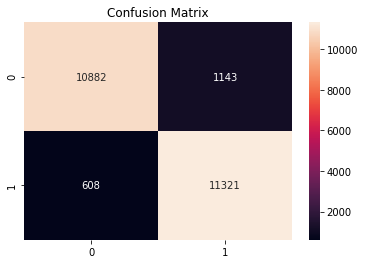

In [147]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [148]:
cm

array([[10882,  1143],
       [  608, 11321]], dtype=int64)

In [149]:
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93     12025
           1       0.91      0.95      0.93     11929

    accuracy                           0.93     23954
   macro avg       0.93      0.93      0.93     23954
weighted avg       0.93      0.93      0.93     23954



In [150]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.9269015613258746
Precision = 0.9082958921694481
Recall = 0.9490317713136055
F1 Score = 0.9282171114664043


ROC AUC = 0.9862891120048703


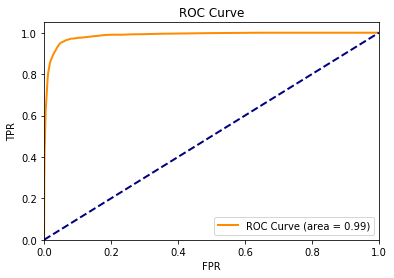

In [151]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = RF.predict_proba(Xtest)
fpr,tpr,threshold = roc_curve(ytest,ypred[:,1])
roc_auc = roc_auc_score(ytest,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()